In [1]:
import import_ipynb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Projects\salary_project_ds\salary_data_cleaned.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,max_salary,avg_salary,company_txt,job_state,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn
0,Data Scientist,Employer Provided Salary:$55 - $60 Per Hour,Job Description:\r\nPython\r\nMachine learning...,-1.0,Amaze Systems Inc,Remote,Unknown,-1.0,Company - Public,-1,...,60,57.5,Amaze Systems Inc,Remote,-1.0,1,0,0,0,0
1,Data Scientist,Employer Provided Salary:$70 - $80 Per Hour,We are looking for a Data Scientist to analyze...,-1.0,Radcube LLC,Remote,-1,-1.0,-1,-1,...,80,75.0,Radcube LLC,Remote,-1.0,0,0,0,0,0
2,Data Scientist,Employer Provided Salary:$139K - $276K,We are currently seeking a Senior Data Scienti...,4.6,Comcentric\r\n4.6,Remote,51 to 200 Employees,2003.0,Company - Private,IT Services,...,276,207.5,Comcentric\r\n,Remote,19.0,0,0,0,0,0
3,Data Scientist,Employer Provided Salary:$40 - $50 Per Hour,Urgent!!\r\nJob Description\r\nJob Title: Data...,-1.0,INNOVATIVE BI SOLUTIONS INC,Remote,-1,-1.0,-1,-1,...,50,45.0,INNOVATIVE BI SOLUTIONS INC,Remote,-1.0,1,0,0,0,0
4,Data Scientist,Employer Provided Salary:$50 - $55 Per Hour,Data Scientist\r\nRemote\r\nPrimary Skills:\r\...,5.0,Apptrics LLC\r\n5.0,Remote,51 to 200 Employees,-1.0,Company - Public,-1,...,55,52.5,Apptrics LLC\r\n,Remote,-1.0,0,0,0,0,0


In [3]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer provided salary',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn'],
      dtype='object')

In [4]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning engineer'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    elif 'scientist' in title.lower():
        return 'other scientist'
    elif 'data modeler' in title.lower():
        return 'data modeler'
    elif 'data' and 'anal' in title.lower():
        return 'data analitics'
    else:
        return 'na'  #not applicable
    
def seniority(title):
    if 'jr' in title.lower() or 'junior' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    elif 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'sr'
    else:
        return 'na'
    
##Job title and seniority

In [5]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df.job_simp.value_counts()

data scientist     941
other scientist     19
analyst             15
manager             14
data analitics       4
na                   2
director             1
Name: job_simp, dtype: int64

In [6]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na    739
sr    228
jr     29
Name: seniority, dtype: int64

In [7]:
df.job_state.value_counts()

 CA           226
Remote        161
 WA           132
 NY           122
 MD            99
 UT            54
 CO            33
 AL            23
 KY            19
 TX            19
 AZ            19
 IL            19
 MO            17
 OR            17
California      7
 IN             6
Oregon          5
 NJ             5
 GA             5
 FL             3
 WV             1
 WI             1
 MN             1
 NC             1
 DC             1
Name: job_state, dtype: int64

In [8]:
df['job_state'] = df['job_state'].replace(['California'],'CA')
df['job_state'] = df['job_state'].replace(['Oregon'],'  OR')
df.job_state.value_counts()

 CA       226
Remote    161
 WA       132
 NY       122
 MD        99
 UT        54
 CO        33
 AL        23
 AZ        19
 KY        19
 TX        19
 IL        19
 OR        17
 MO        17
CA          7
 IN         6
  OR        5
 GA         5
 NJ         5
 FL         3
 MN         1
 NC         1
 WI         1
 DC         1
 WV         1
Name: job_state, dtype: int64

In [9]:
#Job description length

df['desc_len'] = df['Job Description'].apply(lambda x : len(x))
df['desc_len']

0       405
1       744
2       641
3       134
4       543
       ... 
991     772
992    1286
993    1343
994    1051
995     870
Name: desc_len, Length: 996, dtype: int64

In [10]:
#hourly wage to annual

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly==1 else x.min_salary,axis=1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly==1 else x.max_salary,axis=1)

In [11]:
df[df['hourly']==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
0,1,110,120
1,1,140,160
3,1,80,100
4,1,100,110
5,1,150,190
6,1,100,120
8,1,110,120
12,1,38,134
15,1,110,140
20,1,160,160


In [12]:
df.company_txt

0                Amaze Systems Inc
1                      Radcube LLC
2                   Comcentric\r\n
3      INNOVATIVE BI SOLUTIONS INC
4                 Apptrics LLC\r\n
                  ...             
991         PlayStation Global\r\n
992                     Google\r\n
993              Expedia Group\r\n
994           Costco Wholesale\r\n
995                      Bayer\r\n
Name: company_txt, Length: 996, dtype: object

In [13]:
df.company_txt = df.company_txt.apply(lambda x: x.replace('\n','').replace('\r',''))
df.company_txt

0                Amaze Systems Inc
1                      Radcube LLC
2                       Comcentric
3      INNOVATIVE BI SOLUTIONS INC
4                     Apptrics LLC
                  ...             
991             PlayStation Global
992                         Google
993                  Expedia Group
994               Costco Wholesale
995                          Bayer
Name: company_txt, Length: 996, dtype: object

In [14]:
df.describe()

,Rating,Founded,hourly,employer provided salary,min_salary,max_salary,avg_salary,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn,desc_len
count,996.000000,995.000000,996.000000,996.000000,996.000000,996.000000,996.000000,995.000000,996.000000,996.0,996.000000,996.000000,996.000000,996.000000
mean,3.578313,1723.876382,0.010040,0.025100,118.479920,200.183735,158.716365,29.613065,0.138554,0.0,0.055221,0.029116,0.115462,1268.110442
std,1.521799,676.050066,0.099746,0.156509,37.369009,54.929698,43.438978,40.723932,0.345654,0.0,0.228526,0.168217,0.319739,1093.034358
min,-1.000000,-1.000000,0.000000,0.000000,38.000000,44.000000,43.000000,-1.000000,0.000000,0.0,0.000000,0.000000,0.000000,106.000000
25%,3.700000,1972.000000,0.000000,0.000000,85.000000,171.000000,122.500000,7.000000,0.000000,0.0,0.000000,0.000000,0.000000,681.500000
50%,4.000000,1996.000000,0.000000,0.000000,139.000000,194.000000,182.000000,23.000000,0.000000,0.0,0.000000,0.000000,0.000000,877.000000
75%,4.300000,2008.000000,0.000000,0.000000,139.000000,225.000000,187.000000,30.000000,0.000000,0.0,0.000000,0.000000,0.000000,1286.000000
max,5.000000,2019.000000,1.000000,1.000000,187.000000,276.000000,207.500000,247.000000,1.000000,0.0,1.000000,1.000000,1.000000,5960.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Job Title                 996 non-null    object 
 1   Salary Estimate           996 non-null    object 
 2   Job Description           996 non-null    object 
 3   Rating                    996 non-null    float64
 4   Company Name              996 non-null    object 
 5   Location                  996 non-null    object 
 6   Size                      996 non-null    object 
 7   Founded                   995 non-null    float64
 8   Type of ownership         990 non-null    object 
 9   Industry                  994 non-null    object 
 10  Sector                    993 non-null    object 
 11  Revenue                   995 non-null    object 
 12  hourly                    996 non-null    int64  
 13  employer provided salary  996 non-null    int64  
 14  min_salary

In [16]:
df.isna().sum()

Job Title                   0
Salary Estimate             0
Job Description             0
Rating                      0
Company Name                0
Location                    0
Size                        0
Founded                     1
Type of ownership           6
Industry                    2
Sector                      3
Revenue                     1
hourly                      0
employer provided salary    0
min_salary                  0
max_salary                  0
avg_salary                  0
company_txt                 0
job_state                   0
age                         1
python_yn                   0
R_yn                        0
spark_yn                    0
aws_yn                      0
excel_yn                    0
job_simp                    0
seniority                   0
desc_len                    0
dtype: int64

In [17]:
df['Type of ownership'] = df['Type of ownership'].fillna(df['Type of ownership'].mode()[0])
df['Sector'] = df['Sector'].fillna(df['Sector'].mode()[0])
df['Industry'] = df['Industry'].fillna(df['Industry'].mode()[0])
df.dropna(inplace=True)

In [18]:
df.isna().sum()

Job Title                   0
Salary Estimate             0
Job Description             0
Rating                      0
Company Name                0
Location                    0
Size                        0
Founded                     0
Type of ownership           0
Industry                    0
Sector                      0
Revenue                     0
hourly                      0
employer provided salary    0
min_salary                  0
max_salary                  0
avg_salary                  0
company_txt                 0
job_state                   0
age                         0
python_yn                   0
R_yn                        0
spark_yn                    0
aws_yn                      0
excel_yn                    0
job_simp                    0
seniority                   0
desc_len                    0
dtype: int64

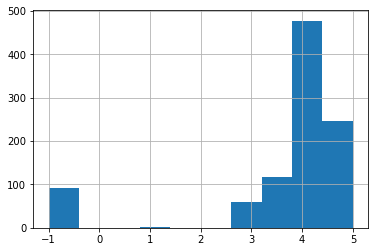

In [19]:
df.Rating.hist()

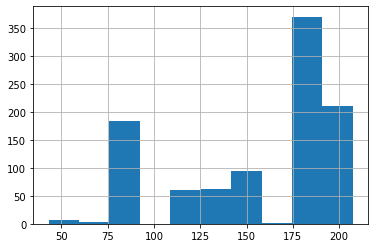

In [20]:
df.avg_salary.hist()

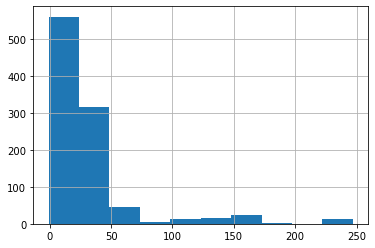

In [21]:
df.age.hist()

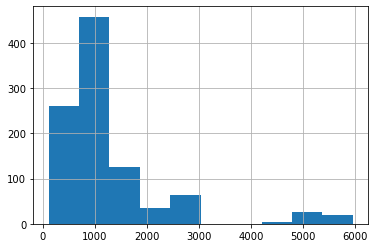

In [22]:
df.desc_len.hist()

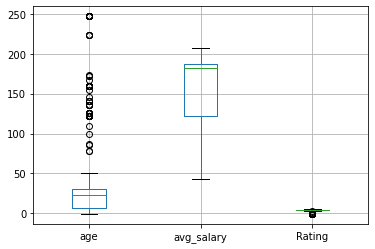

In [23]:
df.boxplot(column=['age','avg_salary','Rating'])

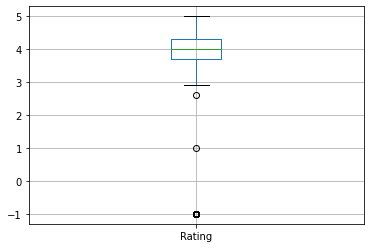

In [24]:
df.boxplot(column=['Rating'])

In [25]:
df[['age','avg_salary','Rating']].corr()

,age,avg_salary,Rating
age,1.000000,0.025375,0.229264
avg_salary,0.025375,1.000000,0.063672
Rating,0.229264,0.063672,1.000000


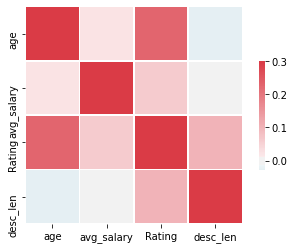

In [26]:
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr(),vmax=.3,cmap=cmap,center=0,square=True, linewidths=0.5,cbar_kws={"shrink":.5})

In [27]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer provided salary',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn',
       'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [28]:
df_cat = df[['Location', 'Size','Type of ownership','Industry', 'Sector', 'Revenue','company_txt', 'job_state','python_yn', 'R_yn','spark_yn', 'aws_yn', 'excel_yn',
       'job_simp', 'seniority']]

graph for Location: total=49


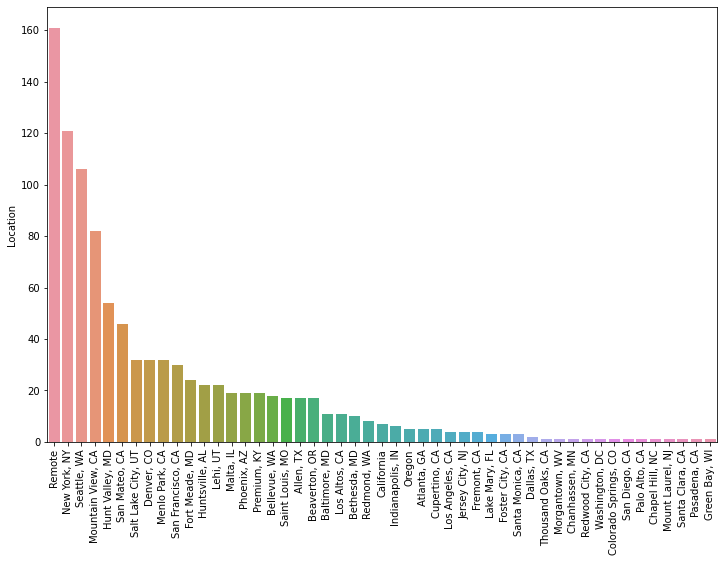

graph for Size: total=9


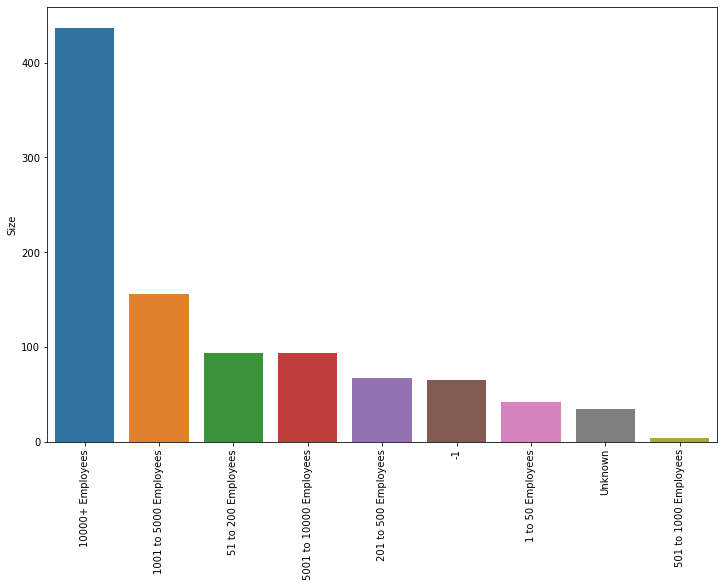

graph for Type of ownership: total=8


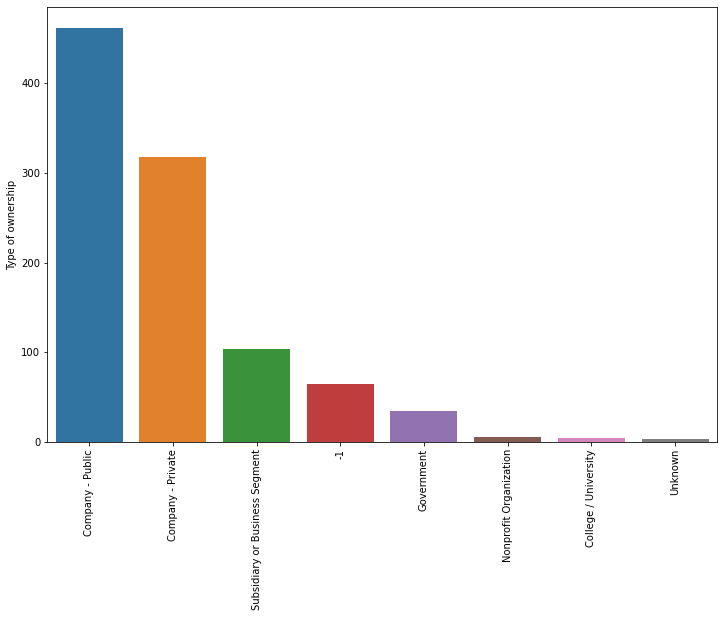

graph for Industry: total=35


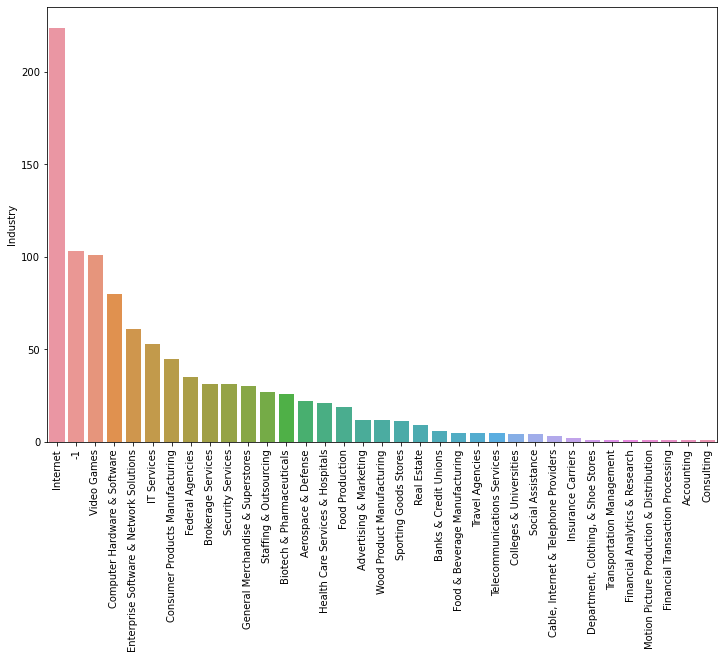

graph for Sector: total=20


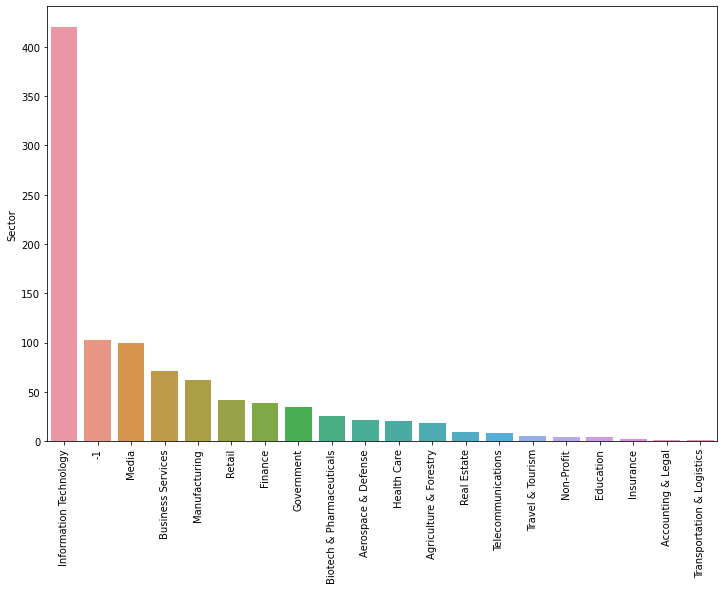

graph for Revenue: total=12


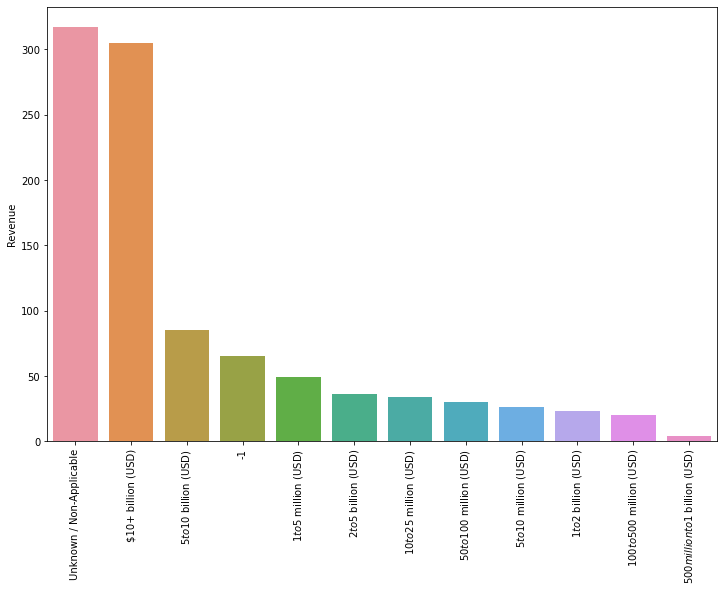

graph for company_txt: total=105


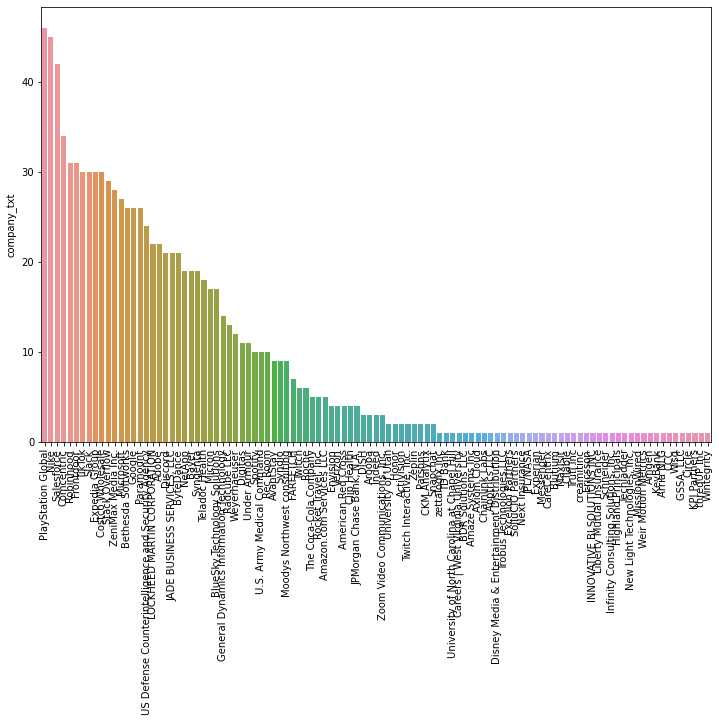

graph for job_state: total=25


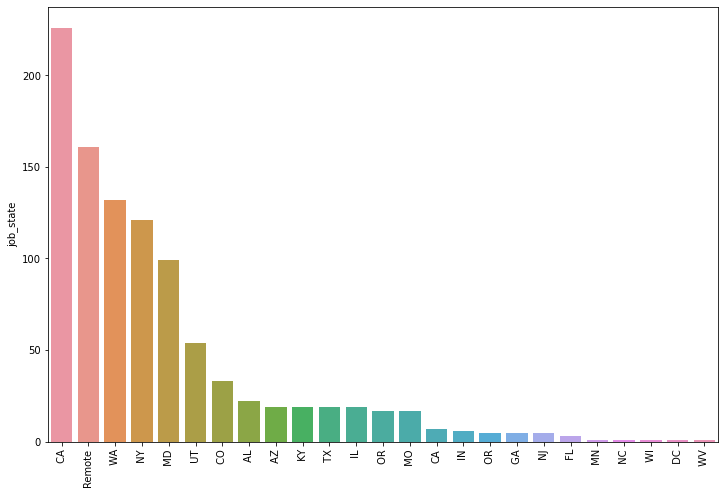

graph for python_yn: total=2


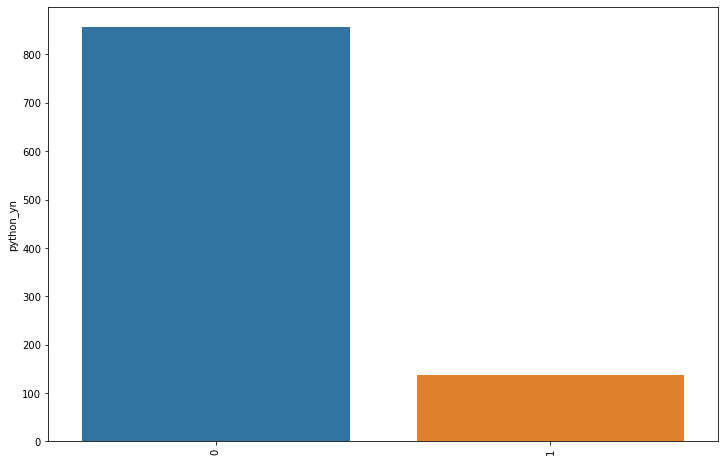

graph for R_yn: total=1


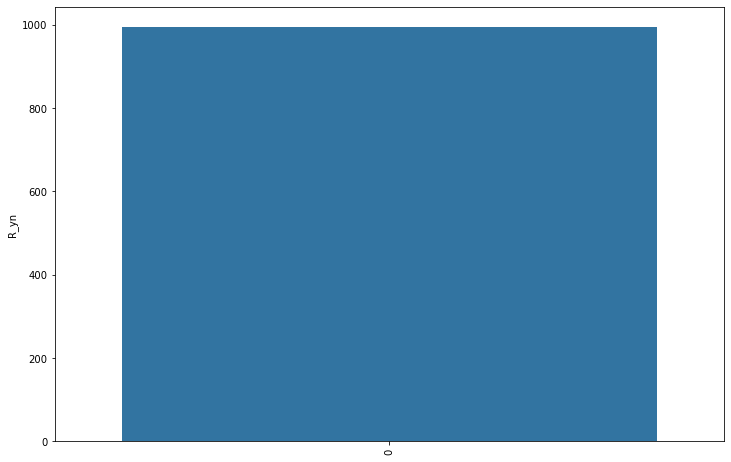

graph for spark_yn: total=2


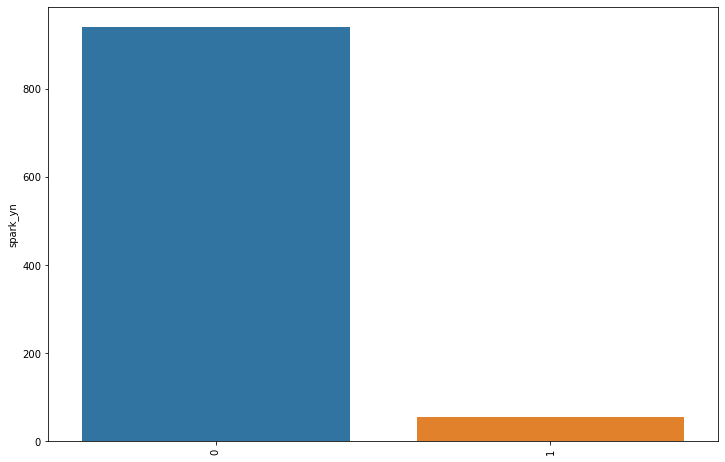

graph for aws_yn: total=2


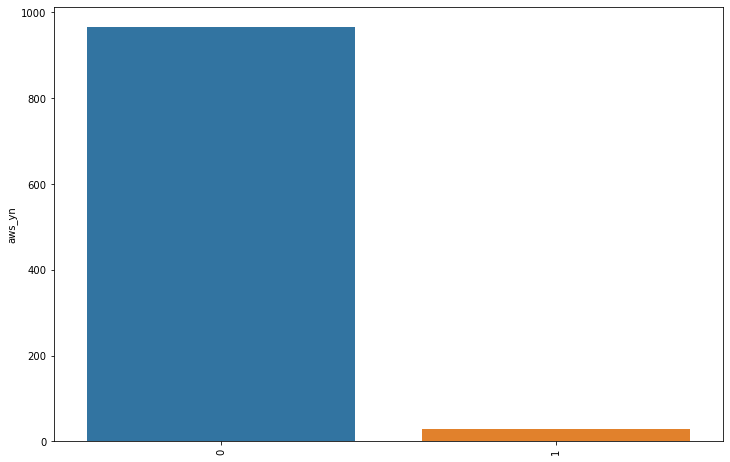

graph for excel_yn: total=2


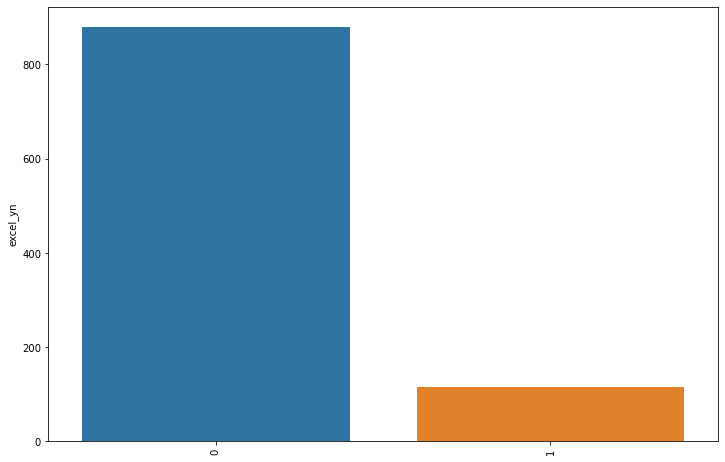

graph for job_simp: total=7


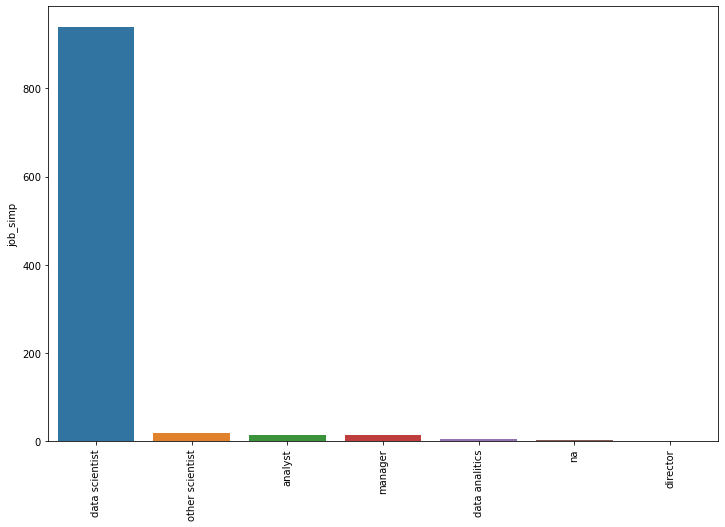

graph for seniority: total=3


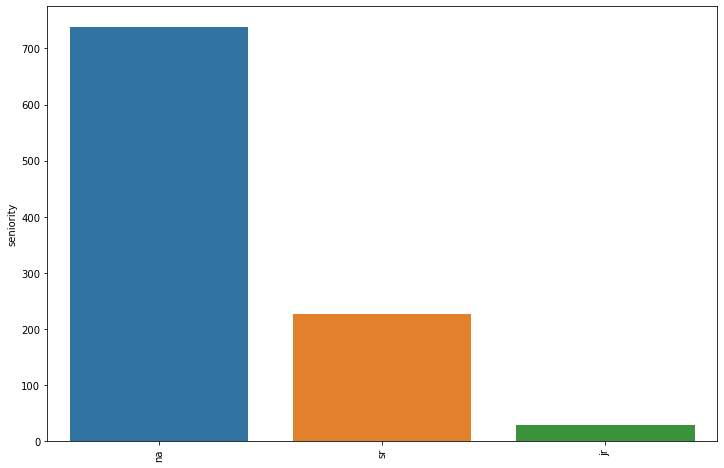

In [29]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    plt.figure(figsize=(12,8))
    print("graph for %s: total=%d"%(i,len(cat_num)))
    sns.barplot(x=cat_num.index,y=cat_num)
    plt.xticks(rotation = 90)
    plt.show()

In [30]:
pd.pivot_table(df,index='job_simp',values='avg_salary')

,avg_salary
job_simp,
analyst,150.266667
data analitics,181.375000
data scientist,158.684771
director,187.000000
manager,183.821429
na,125.250000
other scientist,146.763158


In [31]:
pd.pivot_table(df,index=['job_simp','seniority'],values='avg_salary')

avg_salary
job_simp        seniority            
analyst         sr         150.266667
data analitics  na         181.375000
data scientist  jr         145.844828
                na         156.836634
                sr         166.955665
director        na         187.000000
manager         na         183.821429
na              na         125.250000
other scientist na         148.050000
                sr         145.333333

In [32]:
pd.options.display.max_rows
pd.set_option('display.max_rows',None)

In [33]:
pd.pivot_table(df,index=['job_state','job_simp'],values='avg_salary').sort_values('job_state',ascending=False)

avg_salary
job_state job_simp                   
Remote    na               125.250000
          director         187.000000
          data scientist   161.410828
          analyst          207.500000
CA        data scientist   181.214286
 WV       data scientist   207.500000
 WI       data scientist   207.500000
 WA       other scientist  145.333333
          data scientist   150.463415
 UT       data scientist   154.296296
 TX       data scientist   161.947368
 OR       data scientist   158.500000
 NY       manager          175.750000
          data scientist   159.517391
          data analitics   181.375000
 NJ       data scientist   199.300000
 NC       data scientist   187.000000
 MO       data scientist   147.705882
 MN       data scientist   207.500000
 MD       data scientist   157.808081
 KY       data scientist   158.815789
 IN       manager          176.833333
 IL       data scientist   144.473684
 GA       data scientist   190.700000
 FL       data scientist   160.833333
 DC       data scientist    65.000000
 CO       data scientist   158.909091
 CA       other scientist  148.050000
          manager          193.500000
          data scientist   160.377551
          analyst          146.178571
 AZ       data scientist   173.500000
 AL       data scientist   146.568182
  OR      data scientist   207.500000

In [34]:
pd.pivot_table(df,index=['job_state','job_simp'],values='avg_salary',aggfunc='count').sort_values('job_state',ascending=False)

avg_salary
job_state job_simp                   
Remote    na                        2
          director                  1
          data scientist          157
          analyst                   1
CA        data scientist            7
 WV       data scientist            1
 WI       data scientist            1
 WA       other scientist           9
          data scientist          123
 UT       data scientist           54
 TX       data scientist           19
 OR       data scientist           17
 NY       manager                   2
          data scientist          115
          data analitics            4
 NJ       data scientist            5
 NC       data scientist            1
 MO       data scientist           17
 MN       data scientist            1
 MD       data scientist           99
 KY       data scientist           19
 IN       manager                   6
 IL       data scientist           19
 GA       data scientist            5
 FL       data scientist            3
 DC       data scientist            1
 CO       data scientist           33
 CA       other scientist          10
          manager                   6
          data scientist          196
          analyst                  14
 AZ       data scientist           19
 AL       data scientist           22
  OR      data scientist            5

In [35]:
pd.pivot_table(df[df.job_simp=="data scientist"],index='job_state',values='avg_salary').sort_values('avg_salary',ascending=False)

,avg_salary
job_state,
OR,207.500000
MN,207.500000
WV,207.500000
WI,207.500000
NJ,199.300000
GA,190.700000
NC,187.000000
CA,181.214286
AZ,173.500000


In [36]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer provided salary',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn',
       'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [37]:
df_pivots = df[['Rating','Industry', 'Sector', 'Revenue','hourly', 'employer provided salary','python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn',
       'Type of ownership','avg_salary']]

In [38]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index=i,values='avg_salary').sort_values('avg_salary',ascending=False))

Rating
        avg_salary
Rating            
 3.2    207.500000
 1.0    207.500000
 4.8    186.333333
 4.3    171.625000
 3.7    169.375000
 3.9    167.015625
 3.3    165.500000
 4.6    163.869863
 3.1    162.808824
 3.4    162.757576
 4.5    160.452703
 4.0    159.698347
 3.6    158.684211
 4.2    158.562500
 4.4    157.824675
 3.8    155.345455
 4.1    155.047619
 5.0    151.750000
-1.0    149.690217
 2.9    149.000000
 2.6     65.000000
Industry
                                          avg_salary
Industry                                            
Financial Analytics & Research            207.500000
Consulting                                207.500000
Motion Picture Production & Distribution  207.500000
Accounting                                207.500000
Financial Transaction Processing          207.500000
Transportation Management                 207.500000
Department, Clothing, & Shoe Stores       207.500000
Social Assistance                         202.375000
Cable, Internet &

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [41]:
pd.pivot_table(df_pivots,index='Revenue',columns='python_yn',values='avg_salary',aggfunc='count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),23.0,NaN
$1 to $5 million (USD),23.0,26.0
$10 to $25 million (USD),34.0,NaN
$10+ billion (USD),278.0,27.0
$100 to $500 million (USD),19.0,1.0
$2 to $5 billion (USD),36.0,NaN
$5 to $10 billion (USD),66.0,19.0
$5 to $10 million (USD),26.0,NaN
$50 to $100 million (USD),29.0,1.0


In [42]:
from wordcloud import WordCloud , ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

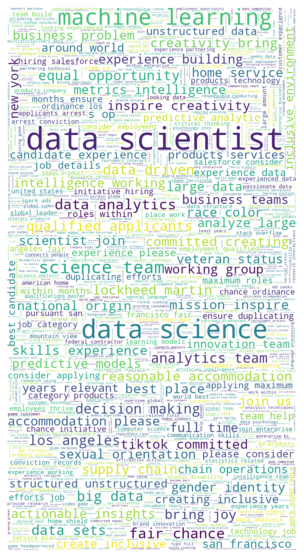

In [43]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """ remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color="white",random_state=1,stopwords=STOPWORDS,max_words=2000,width=800,height=1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [44]:
df.to_csv('eda_data.csv')